In [72]:
# import os
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
from itertools import combinations
import os
import pandas as pd
import pickle
import numpy as np
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.spike_recording as recording
import behavior.boris_extraction as boris
from lfp.trodes import read_exported as tr
import spike.spike_analysis.pca_trajectories as pca_trajectories
import pickle
import behavior.behavioral_epoch_tools as bet
import ffmpeg
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [73]:
only_subject_collection = collection.SpikeCollection(r'C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\sorted')
timestamps_dir = (r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\videoTimeStamps")
timestamps_dict = {}
for root, dirs, files in os.walk(timestamps_dir):
    for file in files:
        if file.endswith('.videoTimeStamps'):
            file_path = os.path.join(root, file)
            timestamp_array = tr.readCameraModuleTimeStamps(file_path)
            rec_name = file.replace('.videoTimeStamps','')
            timestamps_dict[rec_name] = timestamp_array

print(timestamps_dict.keys())


loading  11_CNF_merged.rec
loading  11_NCF_merged.rec
loading  12_CNF_merged.rec
loading  13_NCF_merged.rec
loading  21_FCN_merged.rec
loading  21_NCF_merged.rec
loading  22_FCN_merged.rec
loading  22_NCF_merged.rec
loading  23_CNF_merged.rec
loading  23_NFC_merged.rec
loading  24_CNF_merged.rec
loading  24_NFC_merged.rec
loading  31_NFC_merged.rec
31_NFC_merged.rec has no good units
and will not be included in the collection
loading  32_NFC_merged.rec
loading  41_FCN_merged.rec
loading  44_FCN_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject
dict_keys(['11_12_23_24.1', '11_12_23_24.2', '11_13_21_22.1', '11_13_21_22.2', '21_22_41_44.1', '21_22_41_44.2', '23_24_31_32.1', '23_24_31_32.2'])


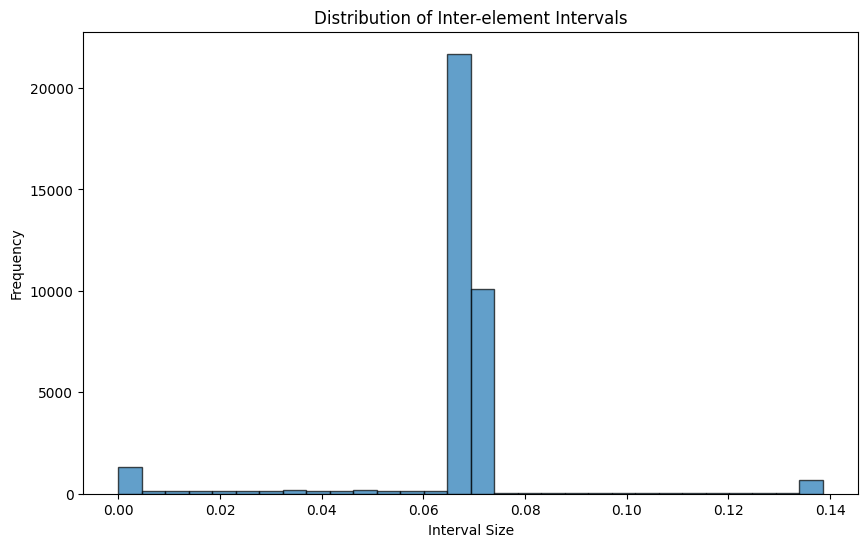

In [115]:
intervals = np.diff(timestamps_dict['23_24_31_32.1'])
plt.figure(figsize=(10, 6))
plt.hist(intervals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Interval Size')
plt.ylabel('Frequency')
plt.title('Distribution of Inter-element Intervals')
plt.show()

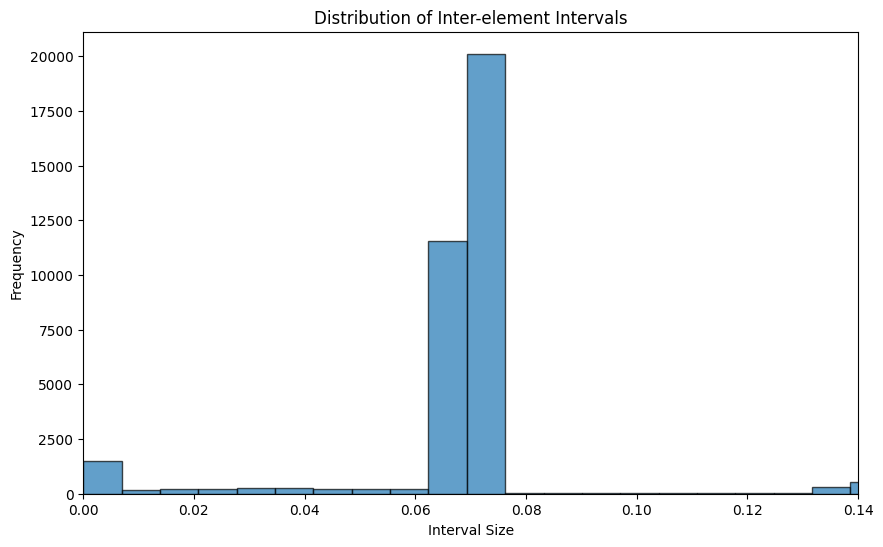

In [119]:
intervals = np.diff(timestamps_dict['23_24_31_32.2'])
plt.figure(figsize=(10, 6))
plt.hist(intervals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Interval Size')
plt.xlim(0,0.14)
plt.ylabel('Frequency')
plt.title('Distribution of Inter-element Intervals')
plt.show()

In [100]:
data_path = r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data"
def find_start_recording_time(recording, data_path):
    
    """If the timestamps file is found at self.merged_rec_path, then use it. Otherwise ask user to create it"""
    for dir in os.listdir(data_path):
        if dir.endswith('.rec'):
            rec_path = os.path.join(data_path, dir)
            for dir in os.listdir(rec_path):
                if dir.endswith('_merged.time'):
                    time_path = os.path.join(rec_path, dir)
                    for file in os.listdir(time_path):
                        print(file)
                        if file.endswith('.timestamps.dat'):
                            print(file)
                            timestamps_file_path = os.path.join(time_path, file)
                            print(timestamps_file_path)
                            timestamps = tr.read_trodes_extracted_data_file(timestamps_file_path)
                            first_timestamp = int(timestamps["first_timestamp"])
                            print(first_timestamp)
                            print("Found first timestamp")
                
      
for rec in only_subject_collection.recordings:
    find_start_recording_time(rec, data_path)



11_CNF_merged.timestamps.dat
11_CNF_merged.timestamps.dat
C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\11_12_23_24.rec\11_CNF_merged.time\11_CNF_merged.timestamps.dat


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:190: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


1571577
Found first timestamp
12_CNF_merged.timestamps.dat
12_CNF_merged.timestamps.dat
C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\11_12_23_24.rec\12_CNF_merged.time\12_CNF_merged.timestamps.dat
1571577
Found first timestamp
23_CNF_merged.timestamps.dat
23_CNF_merged.timestamps.dat
C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\11_12_23_24.rec\23_CNF_merged.time\23_CNF_merged.timestamps.dat
1571577
Found first timestamp
24_CNF_merged.timestamps.dat
24_CNF_merged.timestamps.dat
C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\11_12_23_24.rec\24_CNF_merged.time\24_CNF_merged.timestamps.dat
1571577
Found first timestamp
11_NCF_merged.timestamps.dat
11_NCF_merged.timestamps.dat
C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects

KeyboardInterrupt: 

In [12]:
recording = se.read_spikegadgets(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\11_12_23_24.rec\11_CNF_merged.rec", stream_id="trodes")
print(recording)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\megha\\UFL Dropbox\\Meghan Cum\\Padilla-Coreano Lab\\2024\\Cum_SocialMemEphys_pilot2\\Only_Subjects (phase 5)\\data\\11_12_23_24.rec\\11_CNF_merged.rec'

40.04007916666667

In [9]:
print(timestamps_dict['11_12_23_24.1'][-1]/60)

41.34972666666667


In [13]:
timestamps_dict.keys()

dict_keys(['11_12_23_24.1', '11_12_23_24.2', '11_13_21_22.1', '11_13_21_22.2', '21_22_41_44.1', '21_22_41_44.2', '23_24_31_32.1', '23_24_31_32.2'])

In [16]:
print(timestamps_dict['23_24_31_32.1'][-1]/60)
print(timestamps_dict['23_24_31_32.2'][-1]/60)
print(len(timestamps_dict['23_24_31_32.1']))
print(len(timestamps_dict['23_24_31_32.2']))
#only_subject_collection.recording_details()

42.37989
42.37989
36095
36093


In [18]:
!ffmpeg -i "C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\23_24_31_32.rec\23_24_31_32.1.h264" -vframes 1 first_frame.png


& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.
ffmpeg version 5.1.2-full_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-li

In [3]:
!ffprobe -v error -select_streams v:0 -count_packets -show_entries stream=nb_read_packets "C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\23_24_31_32.rec\23_24_31_32.1.h264"
!ffprobe -v error -select_streams v:0 -count_packets -show_entries stream=nb_read_packets "C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\23_24_31_32.rec\23_24_31_32.2.h264"


[STREAM]
nb_read_packets=36095
[/STREAM]


& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.


[STREAM]
nb_read_packets=36093
[/STREAM]


& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.


In [5]:
!ffprobe -v error -select_streams v:0 -count_packets -show_entries stream=nb_read_packets "C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\SLEAP\only_subjects_mp4s\dark\23_24_31_32.1_converted.mp4"
!ffprobe -v error -select_streams v:0 -count_packets -show_entries stream=nb_read_packets "C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\SLEAP\only_subjects_mp4s\dark\23_24_31_32.2_converted.mp4"


[STREAM]
nb_read_packets=36095
[/STREAM]


& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.


[STREAM]
nb_read_packets=36093
[/STREAM]


& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.


In [41]:

timestamps_file_path = r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Only_Subjects (phase 5)\data\23_24_31_32.rec\23_NFC_merged.time\23_NFC_merged.timestamps.dat"
timestamps = tr.read_trodes_extracted_data_file(timestamps_file_path)
first_timestamp = int(timestamps["first_timestamp"])
print(first_timestamp/20000*15)

test_timestamps = timestamps_dict['23_24_31_32.1']
aligned_timestamps = test_timestamps - first_timestamp/20000
aligned_timestamps[-1]

2046.5834999999997


2406.3545

In [63]:
for recording in only_subject_collection.recordings:
    subject = str(int(recording.name.split('_')[0])/10)
    recording.set_subject(subject)

In [64]:
boris_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\only_subjects"

boris_dfs = {}

for file in os.listdir(boris_path):
    csv_path = os.path.join(boris_path, file)
    df = pd.read_csv(csv_path)
    boris_dfs[file] = df

In [65]:
pairs = []
for rec_pairs in combinations(boris_dfs.keys(), 2):
    rec1 = rec_pairs[0].split('.')[0]
    rec2 = rec_pairs[1].split('.')[0]
    if rec1 == rec2:
        pairs.append(rec_pairs)
pairs

[('11_12_23_24.1.csv', '11_12_23_24.2.csv'),
 ('11_13_21_22.1.csv', '11_13_21_22.2.csv'),
 ('21_22_41_44.1.csv', '21_22_41_44.2.csv'),
 ('23_24_31_32.1.csv', '23_24_31_32.2.csv')]

In [152]:
def get_behavior_bouts_frame(boris_df, cameratimestamps, subject, behavior, min_iti=0, min_bout=0):
    """
    extracts behavior bout start and stop times from a boris df
    thresholds individually by subject and behavior
    returns start_stop_array ordered by start values

    Args (6 total, 4 required):
        boris_df: pandas dataframe of a boris file (aggregated event table)
        cameratimestamps: numpy array of camera timestamps (in seconds) read from .videoTimeStamps file generated from trodes
        subject: list of strings or ints, desired subject(s)
                as written in boris_df, i.e. 'novel' or 1.1
        behavior: list of strings, desired behavior(s) (as written in boris_df)
        min_iti: float, default=0, bouts w/ itis(s) < min_iti will be combined
        min_bout: float, default=0, bouts < min_bout(s) will be deleted

    Returns (1):
        numpy array (ndim=(n bouts, 2)) of start&stop times (ms)
    """
    start_stop_arrays = []
    print(subject, type(subject))
    for mouse in subject:
        subject_df = boris_df[boris_df["Subject"] == mouse]
        subject_df["Image index stop"] = subject_df["Image index stop"].fillna(
            subject_df["Image index start"].shift(-1)
        )
        behavior_arrays = []
        for act in behavior:
            behavior_df = subject_df[subject_df["Behavior"] == act]
            start_stop_array = behavior_df[["Image index start", "Image index stop"]].to_numpy()
            behavior_arrays.append(start_stop_array)
        start_stop_array = np.concatenate(behavior_arrays)
        start_stop_array = start_stop_array.astype(int)
        if mouse == '2.1':
            print(start_stop_array)
        start_stop_array_s = cameratimestamps[start_stop_array]
        start_stop_arrays.append(bet.threshold_bouts(start_stop_array_s, min_iti, min_bout))
    start_stop_array = np.concatenate(start_stop_arrays)
    organizer = np.argsort(start_stop_array[:, 0])
    start_stop_array = start_stop_array[organizer]
    start_stop_array_ms = start_stop_array * 1000  # convert to ms

    return start_stop_array_ms

def get_behavior_bouts_fps(boris_df, cameratimestamps, subject, behavior, min_iti=0, min_bout=0):
    """
    extracts behavior bout start and stop times from a boris df
    thresholds individually by subject and behavior
    returns start_stop_array ordered by start values

    Args (6 total, 4 required):
        boris_df: pandas dataframe of a boris file (aggregated event table)
        cameratimestamps: numpy array of camera timestamps (in seconds) read from .videoTimeStamps file generated from trodes
        subject: list of strings or ints, desired subject(s)
                as written in boris_df, i.e. 'novel' or 1.1
        behavior: list of strings, desired behavior(s) (as written in boris_df)
        min_iti: float, default=0, bouts w/ itis(s) < min_iti will be combined
        min_bout: float, default=0, bouts < min_bout(s) will be deleted

    Returns (1):
        numpy array (ndim=(n bouts, 2)) of start&stop times (ms)
    """
    start_stop_arrays = []
    for mouse in subject:
        subject_df = boris_df[boris_df["Subject"] == mouse]
        if not subject_df.empty:
            behavior_arrays = []
            column_names = subject_df.columns
            for column_name in column_names:
                if 'FPS' in column_name:
                    fps_column = column_name
                    break
            try:
                fps = int(subject_df[fps_column].unique()[0])
            except IndexError:
                print(subject_df)
            for act in behavior:
                behavior_df = subject_df[subject_df["Behavior"] == act]
                start_stop_array = behavior_df[["Start (s)", "Stop (s)"]].to_numpy()
                behavior_arrays.append(start_stop_array)
            start_stop_array = np.concatenate(behavior_arrays)
            start_stop_array = np.round(start_stop_array).astype(int) *fps
            start_stop_array_s = cameratimestamps[start_stop_array]
            start_stop_arrays.append(bet.threshold_bouts(start_stop_array_s, min_iti, min_bout))
        else:
            start_stop_array = np.array([])
            start_stop_arrays.append(start_stop_array)
    if start_stop_arrays:
        # Filter out any empty arrays (extra safety)
        valid_arrays = [arr for arr in start_stop_arrays if arr.size > 0]
        
        if valid_arrays:
            start_stop_array = np.concatenate(valid_arrays)
            organizer = np.argsort(start_stop_array[:, 0])
            start_stop_array = start_stop_array[organizer]
            start_stop_array_ms = start_stop_array * 1000  # convert to ms
            return start_stop_array_ms
    
    # Return empty array with correct shape if no data found
    return np.empty((0, 2))

In [153]:
start_stop_array = np.array([2.8, 3.2])
start_stop_array = np.round(start_stop_array).astype(int)
start_stop_array

array([3, 3])

In [ ]:

get_behavior_bouts_frame(boris_dfs['11_13_21_22.2.csv'], timestamps_dict['11_13_21_22.2'], ['1.1'], ['anogenital sniffing', 'facial sniffing'], min_iti = 1, min_bout = 0.5)

dict_keys(['11_12_23_24.1', '11_12_23_24.2', '11_13_21_22.1', '11_13_21_22.2', '21_22_41_44.1', '21_22_41_44.2', '23_24_31_32.1', '23_24_31_32.2'])
['1.1'] <class 'list'>


C:\Users\megha\AppData\Local\Temp\ipykernel_21456\843819453.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df["Image index stop"] = subject_df["Image index stop"].fillna(


array([[ 781838.25,  782392.6 ],
       [ 810595.05,  811842.3 ],
       [ 853349.1 ,  853903.45],
       [ 879472.75,  882383.1 ],
       [ 883422.5 ,  884808.35],
       [ 885847.75,  887510.8 ],
       [ 892084.15,  895340.95],
       [ 898944.2 ,  902339.6 ],
       [ 930819.2 ,  934145.3 ],
       [ 936479.1 ,  940797.5 ],
       [ 947241.75,  948281.2 ],
       [ 954725.45,  956111.35],
       [ 957912.95,  958467.3 ],
       [ 962278.45,  964357.25],
       [ 965673.85,  966782.55],
       [ 970039.35,  972533.9 ],
       [1035937.45, 1037254.  ],
       [1038501.3 , 1041550.2 ],
       [1133578.8 , 1134542.05],
       [1152142.6 , 1153597.75],
       [1171821.95, 1172930.65],
       [1219980.9 , 1220535.25],
       [1295372.2 , 1296273.  ],
       [1302162.95, 1303895.3 ],
       [1359745.85, 1360369.5 ]])

In [155]:
timestamps_dict['11_13_21_22.2'][0]

177.32195

In [176]:
from importlib import reload
from collections import defaultdict
reload(boris)

bouts = {}
ins = {}
outs = {}
for rec_pair in pairs:
    common = rec_pair[0].split('.')[0]
    subjects = []
    for i in range(4):
        subjects.append(str(int(common.split('_')[i])/10))
    bouts[common] = {str(subject): [] for subject in subjects}
    for rec in rec_pair:
        timestamps = timestamps_dict[rec.replace('.csv', '')]
        example_df = boris_dfs[rec]
        example_df['Subject'] = example_df['Subject'].astype(str)
        column_names = example_df.columns
        for column_name in column_names:
            if 'FPS' in column_name:
                fps_column = column_name
                break
        fps = int(example_df[fps_column].unique()[0])
        if len(example_df[example_df['Behavior'] == 'mice back in']["Start (s)"]) == 6:
            if 'Image index start' not in example_df.columns:
                ins_times = np.array(example_df[example_df['Behavior'] == 'mice back in']["Start (s)"])[[0,2,4]]
                outs_times = np.array(example_df[example_df['Behavior'] == 'mice taken out']["Start (s)"])[[0,2]]
                ins_frames = np.round(ins_times * fps).astype(int)
                outs_frames = np.round(outs_times * fps).astype(int)
                
            else:
                ins_frames = np.array(example_df[example_df['Behavior'] == 'mice back in']["Image index start"])[[0,2,4]]
                outs_frames= np.array(example_df[example_df['Behavior'] == 'mice taken out']["Image index start"])[[0,2]]
        else:
            if 'Image index start' not in example_df.columns:
                ins_times = np.array(example_df[example_df['Behavior'] == 'mice back in']["Start (s)"])
                outs_times = np.array(example_df[example_df['Behavior'] == 'mice taken out']["Start (s)"])
                ins_frames = np.round(ins_times * fps).astype(int)
                outs_frames = np.round(outs_times * fps).astype(int)
                
            else:
                ins_frames = np.array(example_df[example_df['Behavior'] == 'mice taken out']["Image index start"])
                outs_frames = np.array(example_df[example_df['Behavior'] == 'mice taken out']["Image index start"])
        ins_times = timestamps[ins_frames.astype(int)]
        outs_times = timestamps[outs_frames.astype(int)]
        ins[rec] = ins_times
        outs[rec] = outs_times
        for subject in subjects:
            if 'Image index start' not in example_df.columns:
                bout_array = get_behavior_bouts_fps(example_df, timestamps, [subject], ['anogenital sniffing', 'facial sniffing'], min_iti = 1, min_bout = 0.5)
            else:
                bout_array = boris.get_behavior_bouts_frame(example_df, timestamps, [subject], ['anogenital sniffing', 'facial sniffing'], min_iti = 1, min_bout = 0.5)
            if len(bouts[common][str(subject)]) == 0:
                bouts[common][str(subject)] = bout_array
            else:
                all_bouts = np.concatenate([bouts[common][str(subject)], bout_array])
                sorted_bouts = all_bouts[np.argsort(all_bouts[:,0])]
                bouts[common][str(subject)] = sorted_bouts
                


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\behavior\boris_extraction.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df["Image index stop"] = subject_df["Image index stop"].fillna(
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\behavior\boris_extraction.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df["Image index stop"] = subject_df["Image index stop"].fillna(
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\behavior\boris_extraction.p

In [177]:
CNF = bouts['11_12_23_24']
CNF.keys()

dict_keys(['1.1', '1.2', '2.3', '2.4'])

In [178]:
# 11_12_23_24.1 = 11_12, 11_24, 23_11
# 11_12_23_24.2 = 23_24, 12_23, 12_24

In [179]:
print(ins['11_12_23_24.2.csv'])
print(outs['11_12_23_24.2.csv'])

[1284.701  1883.1195]
[1284.701  1883.1195]


In [ ]:
print(timestamps_dict['11_12_23_24.2'][-1]/60)

#timestamps_dict['11_12_23_24.1'][9045]

41.34972666666667


18100.050000000003

In [181]:
print(ins['11_12_23_24.1.csv'])
print(outs['11_12_23_24.1.csv'])

[ 686.97545 1290.66025 1891.15755]
[1284.701   1883.67385]


In [182]:

cagemate_array_11 = CNF['1.1'][CNF['1.1'][:, 1] < ins['11_13_21_22.1.csv'][0]]
cagemate_array_12 = CNF['1.2'][CNF['1.2'][:, 1] < 1206]

cagemate_array_23 = CNF['2.3'][CNF['2.3'][:, 1] < 1205]
cagemate_array_24 = CNF['2.4'][CNF['2.4'][:, 1] < 1205]

novel_array_11 = CNF['1.1'][CNF['1.1'][:, 1] > 1210]
novel_array_11 = novel_array_11[novel_array_11[:,1] < 1805]

novel_array_24 = CNF['2.4'][CNF['2.4'][:, 1] > 1210]
novel_array_24 = novel_array_24[novel_array_24[:,1] < 1805]


novel_array_23 = CNF['2.3'][CNF['2.3'][:, 1] > 1210]
novel_array_23 = novel_array_23[novel_array_23[:,1] < 1805]

novel_array_12 = CNF['1.2'][CNF['1.2'][:, 1] > 1210]
novel_array_12 = novel_array_12[novel_array_12[:,1] < 1805]


familiar_array_11 = CNF['1.1'][CNF['1.1'][:, 1] > 1812]
familiar_array_23 = CNF['2.3'][CNF['2.3'][:, 1] > 1812]
familiar_array_12 = CNF['1.2'][CNF['1.2'][:, 1] > 1812]
familiar_array_24 = CNF['2.4'][CNF['2.4'][:, 1] > 1812]

behavior_dicts = {'23_CNF_merged.rec': {'cagemate': cagemate_array_23, 
                                       'familiar': familiar_array_23,
                                       'novel': novel_array_23},
                 '11_CNF_merged.rec': {'cagemate': cagemate_array_11, 
                                       'familiar': familiar_array_11,
                                       'novel': novel_array_11},
                 '12_CNF_merged.rec': {'cagemate': cagemate_array_12, 
                                       'familiar': familiar_array_12,
                                       'novel': novel_array_12},
                 '24_CNF_merged.rec': {'cagemate': cagemate_array_23, 
                                       'familiar': familiar_array_23,
                                       'novel': novel_array_23}}

In [207]:
NCF = bouts['11_13_21_22']
novel_array_21 = NCF['2.1'][NCF['2.1'][:, 1] < 1229]
novel_array_13 = NCF['1.3'][NCF['1.3'][:, 1] < 1229]


novel_array_11 = NCF['1.1'][NCF['1.1'][:, 1] < 1223]
novel_array_22 = NCF['2.2'][NCF['2.2'][:, 1] < 1223]

cagemate_array_11 = NCF['1.1'][NCF['1.1'][:, 1] > 1232]
cagemate_array_11 = cagemate_array_11[cagemate_array_11[:,1] < 1865]

cagemate_array_13 = NCF['1.3'][NCF['1.3'][:, 1] > 1232]
cagemate_array_13 = cagemate_array_13[cagemate_array_13[:,1] < 1865]

cagemate_array_21 = NCF['2.1'][NCF['2.1'][:, 1] > 1235]
cagemate_array_21 = cagemate_array_21[cagemate_array_21[:,1] < 1858]

cagemate_array_22 = NCF['2.2'][NCF['2.2'][:, 1] > 1235]
cagemate_array_22 = cagemate_array_22[cagemate_array_22[:,1] < 1858]

familiar_array_11 = NCF['1.1'][NCF['1.1'][:, 1] > 1868]
familiar_array_21 = NCF['2.1'][NCF['2.1'][:, 1] > 1868]
familiar_array_22 = NCF['2.2'][NCF['2.2'][:, 1] > 1874]
familiar_array_13 = NCF['1.3'][NCF['1.3'][:, 1] > 1874]


behavior_dicts.update({'22_NCF_merged.rec': {'cagemate': cagemate_array_22*1000, 
                                       'familiar': familiar_array_22*1000,
                                       'novel': novel_array_22*1000},
                 '11_NCF_merged.rec': {'cagemate': cagemate_array_11*1000, 
                                       'familiar': familiar_array_11*1000,
                                       'novel': novel_array_11*1000},
                 '13_NCF_merged.rec': {'cagemate': cagemate_array_13*1000, 
                                       'familiar': familiar_array_13*1000,
                                       'novel': novel_array_13*1000},
                 '21_NCF_merged.rec': {'cagemate': cagemate_array_21*1000, 
                                       'familiar': familiar_array_21*1000,
                                       'novel': novel_array_21*1000}})




In [208]:
FCN = bouts['21_22_41_44']
familiar_array_21 = FCN['2.1'][FCN['2.1'][:, 1] < 1234]
familiar_array_41 = FCN['4.1'][FCN['4.1'][:, 1] < 1234]

familiar_array_44 = FCN['4.4'][FCN['4.4'][:, 1] < 1232]
familiar_array_22 = FCN['2.2'][FCN['2.2'][:, 1] < 1232]

cagemate_array_41 = FCN['4.1'][FCN['4.1'][:, 1] > 1242]
cagemate_array_41 = cagemate_array_41[cagemate_array_41[:,1] < 1854]

cagemate_array_44 = FCN['4.4'][FCN['4.4'][:, 1] > 1242]
cagemate_array_44 = cagemate_array_44[cagemate_array_44[:,1] < 1854]

cagemate_array_21 = FCN['2.1'][FCN['2.1'][:, 1] > 1240]
cagemate_array_21 = cagemate_array_21[cagemate_array_21[:,1] < 1849]

cagemate_array_22 = FCN['2.2'][FCN['2.2'][:, 1] > 1240]
cagemate_array_22 = cagemate_array_22[cagemate_array_22[:,1] < 1849]

novel_array_41 = FCN['4.1'][FCN['4.1'][:, 1] > 1861]
novel_array_22 = FCN['2.2'][FCN['2.2'][:, 1] > 1861]

novel_array_21 = FCN['2.1'][FCN['2.1'][:, 1] > 1856]
novel_array_44 = FCN['4.4'][FCN['4.4'][:, 1] > 1856]


behavior_dicts.update({'22_FCN_merged.rec': {'cagemate': cagemate_array_22*1000, 
                                       'familiar': familiar_array_22*1000,
                                       'novel': novel_array_22*1000},
                 '41_FCN_merged.rec': {'cagemate': cagemate_array_41*1000, 
                                       'familiar': familiar_array_41*1000,
                                       'novel': novel_array_41*1000},
                 '44_FCN_merged.rec': {'cagemate': cagemate_array_44*1000, 
                                       'familiar': familiar_array_44*1000,
                                       'novel': novel_array_44*1000},
                 '21_FCN_merged.rec': {'cagemate': cagemate_array_22*1000, 
                                       'familiar': familiar_array_22*1000,
                                       'novel': novel_array_22*1000}})


In [209]:
NFC = bouts['23_24_31_32']
novel_array_23 = NFC['2.3'][NFC['2.3'][:, 1] < 1230]
novel_array_32 = NFC['3.2'][NFC['3.2'][:, 1] < 1230]

novel_array_31 = NFC['3.1'][NFC['3.1'][:, 1] < 1318]
novel_array_24 = NFC['2.4'][NFC['2.4'][:, 1] < 1318]

familiar_array_31 = NFC['3.1'][NFC['3.1'][:, 1] > 1240]
familiar_array_31 = familiar_array_31[familiar_array_31[:,1] < 1803]

familiar_array_23 = NFC['2.3'][NFC['2.3'][:, 1] > 1240]
familiar_array_23 = familiar_array_23[familiar_array_23[:,1] < 1803]

familiar_array_32 = NFC['3.2'][NFC['3.2'][:, 1] > 1330]
familiar_array_32 = familiar_array_32[familiar_array_32[:,1] < 1940]

familiar_array_24 = NFC['2.4'][NFC['2.4'][:, 1] > 1330 ]
familiar_array_24 = familiar_array_24[familiar_array_24[:,1] < 1940]

cagemate_array_31 = NFC['3.1'][NFC['3.1'][:, 1] > 1944]
cagemate_array_32 = NFC['3.2'][NFC['3.2'][:, 1] > 1944]

cagemate_array_23 = NFC['2.3'][NFC['2.3'][:, 1] > 1819]
cagemate_array_24 = NFC['2.4'][NFC['2.4'][:, 1] > 1819]



behavior_dicts.update({'24_NFC_merged.rec': {'familiar': familiar_array_24*1000, 
                                       'cagemate': cagemate_array_24*1000,
                                       'novel': novel_array_24*1000},
                 '31_NFC_merged.rec': {'familiar': familiar_array_31*1000, 
                                       'cagemate': cagemate_array_31*1000,
                                       'novel': novel_array_31*1000},
                 '32_NFC_merged.rec': {'familiar': familiar_array_32*1000, 
                                       'cagemate': cagemate_array_32*1000,
                                       'novel': novel_array_32*1000},
                 '23_NFC_merged.rec': {'familiar': familiar_array_24*1000, 
                                       'familiar': familiar_array_24*1000,
                                       'novel': novel_array_24*1000}})

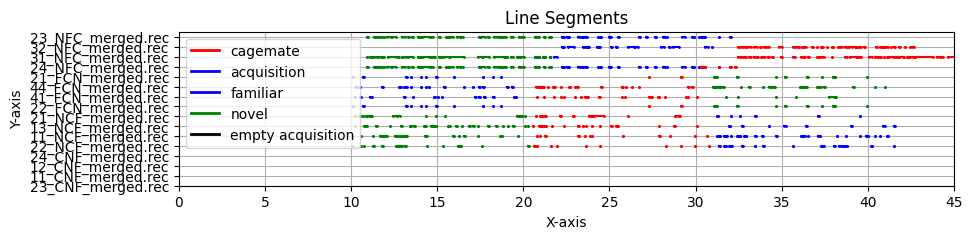

In [210]:
color_dict = {'cagemate': 'r', 'acquisition': 'b', 'familiar': 'b', 'novel': 'g',
              'empty acquisition' : 'k'}
recording_number = 0
plt.figure(figsize = (10,2))
labels = []
for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        if (event =='cagemate'
            ) | (event == 'familiar'
                 ) | (event == 'novel'
                      ) | (event == 'acquisition'
                    ) | (event == 'empty acquisition'):
            for i in range(len(snippets)):
                y = [recording_number,recording_number]
                x = snippets[i]/1000/60
            # Plot the line segments
                plt.plot(x, y, marker='o', linestyle='-', c= color_dict[event], markersize = 1)
    recording_number += .5
# Optionally, you can add labels, title, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Line Segments')
legend_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0,45])
plt.show()

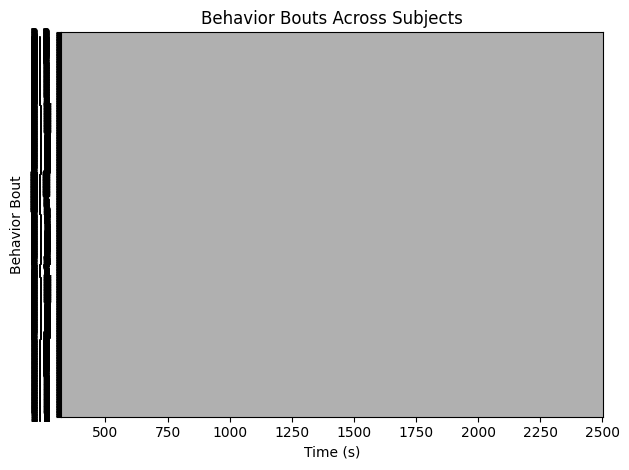

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import random


def plot_bouts(bouts_dict):
    fig, ax = plt.subplots()

    labels = []
    y_positions = []

    i = 0  # vertical index

    for rec, subject_dict in bouts.items():
        for subject, snippets in subject_dict.items():
            for snippet in snippets:
                # Record label and Y position
                labels.append(subject)
                y_positions.append(i)

                # Draw rectangle for this bout
                rect = patches.Rectangle(
                    (snippet[0], i - 0.4),            # (x, y)
                    snippet[1] - snippet[0],          # width
                    0.8,                              # height
                    linewidth=1,
                    facecolor='black',
                    alpha=0.8
                )
                ax.add_patch(rect)
                i += 1  # move to next row

    # Now add Y-axis labels for every row
    plt.yticks(ticks=y_positions, labels=labels)
    plt.xlabel('Time (s)')
    plt.ylabel('Behavior Bout')
    plt.grid(True)

    # Optionally set xlim based on all times
    all_times = [t for rec in bouts.values() for snips in rec.values() for s in snips for t in s]
    plt.xlim(min(all_times) - 5, max(all_times) + 5)

    plt.title('Behavior Bouts Across Subjects')
    plt.tight_layout()
    plt.show()
plot_bouts(bouts)

In [ ]:

    # for i in range(len(ins)):
    #     if i == 2:
    #         dfs.append(example_df[example_df["Start (s)"] > ins[i]])
    #     else:
    #         dfs.append(example_df[(example_df["Start (s)"] > ins[i]) & (example_df["Start (s)"] < outs[i])])
        
    